In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the data

* Using read_csv function of pandas package, imported the dataset

In [2]:
card = pd.read_csv('card_transdata.csv')

In [3]:
card

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
card.info

<bound method DataFrame.info of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2            

# Dropping the duplicates
* Dropping the duplicates (if any) from the dataframe

In [5]:
card.drop_duplicates()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


* There are no duplicate records in the dataset so no records were dropped.

# Exploratory Data Analysis
## Summary of the data
* Viewing the statistical summary of the data using describe function of the daraframe.

In [6]:
card.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Skewness
* Verifying the Skewness of the data.

In [7]:
card.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

## Null Values
* Caluclating the number of null values in the dataframe

In [8]:
card.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## Visualization


<AxesSubplot:>

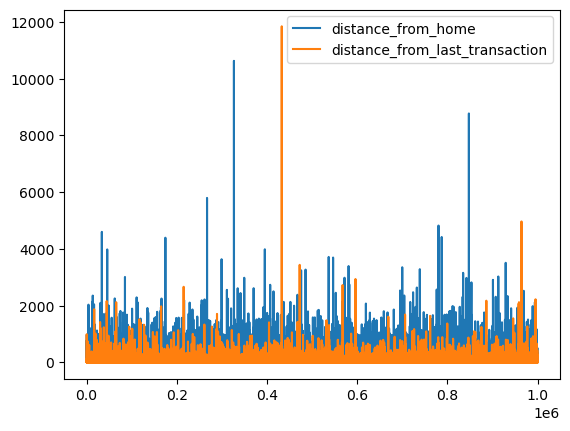

In [9]:
card[['distance_from_home', 'distance_from_last_transaction']].plot()

## Boxplot

Text(0, 0.5, 'Values')

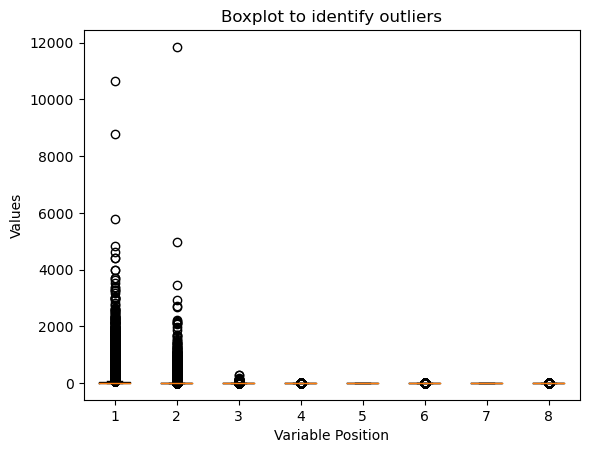

In [10]:
plt.boxplot(card)
plt.title('Boxplot to identify outliers')
plt.xlabel('Variable Position')
plt.ylabel('Values')

# Histogram

In [11]:
columns = ['repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud']

Text(0, 0.5, 'Frequency')

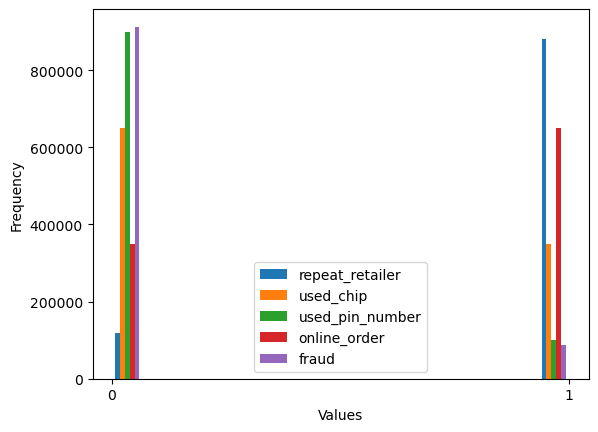

In [12]:
plt.hist(card[columns], histtype='bar', bins = 15, label = columns)
plt.legend()
plt.xticks([0,1])
plt.xlabel('Values')
plt.ylabel('Frequency')

# Correlation results

In [13]:
cor_coef = card.corr()

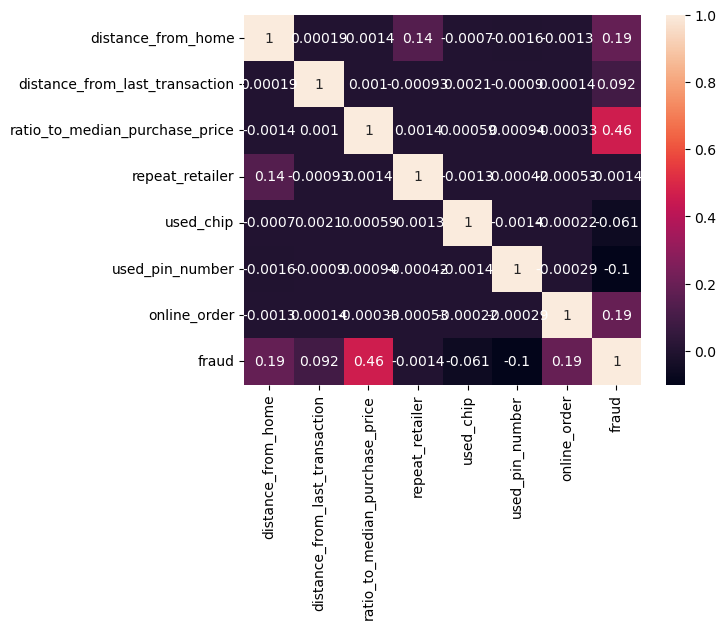

In [14]:
sns.heatmap(cor_coef,annot=True)
plt.show()

In [15]:
card.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

# Since the variable has outliers ans skewness, we can consider the following solutions.
* Data Segmentation: If the outliers represent distinct subpopulations or different behaviors, you can consider segmenting the data and building separate models for each segment.
* Use Robust Models: Some machine learning models, such as Random Forests or robust regression models, are less sensitive to outliers and can handle data with outliers more effectively.
* Box-Cox Transformation: Instead of a simple logarithmic transformation, you can try the Box-Cox transformation, which has a parameter that can be adjusted to make it more or less robust to outliers.
* Transformation Combination: You can combine multiple transformations to deal with different aspects of the data, such as using a log transformation in combination with a winsorizing technique.
* Data Cleaning: If the outliers are due to data entry errors or anomalies, consider carefully reviewing and cleaning the data to correct these errors.


# Meachine Learning Models

In [16]:
card.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [17]:
var = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']

X = card[var]
y = card['fraud']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Logistic Regression


In [19]:
from sklearn.linear_model import LogisticRegression
 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Co-efficients of logistic model:',logreg.coef_)
print('Intercept of logistic model:',logreg.intercept_)

## (b) Accuracy
print("Test Accuracy for logistic model is:", logreg.score(X_test, y_test))
y_test_log = logreg.predict(X_test)

Co-efficients of logistic model: [[  0.0150275    0.02240126   0.80205261  -0.54989474  -0.7507499
  -12.15906602   6.70559852]]
Intercept of logistic model: [-10.40632002]
Test Accuracy for logistic model is: 0.9568733333333334


In [20]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix 

In [21]:
print('Precision score:', precision_score(y_test, y_test_log))
print('Recall score:', recall_score(y_test, y_test_log))
print('Accuracy score:', accuracy_score(y_test, y_test_log))
print('F1 score:', f1_score(y_test, y_test_log))

Precision score: 0.8988649330370548
Recall score: 0.570802028908127
Accuracy score: 0.9568733333333334
F1 score: 0.6982179511102817


In [22]:
log_matrix = confusion_matrix(y_test, y_test_log)
print('Confusion Matrix: ',log_matrix)

Confusion Matrix:  [[272095   1684]
 [ 11254  14967]]


In [23]:
y_pred_proba = logreg.predict_proba(X_test)[:,1]

In [24]:
from sklearn.metrics import roc_auc_score


print("AUC for logistic regression:", roc_auc_score(y_test, y_pred_proba))

AUC for logistic regression: 0.9662474141236197


## ROC Curve

Text(0.5, 1.0, 'ROC_Curve')

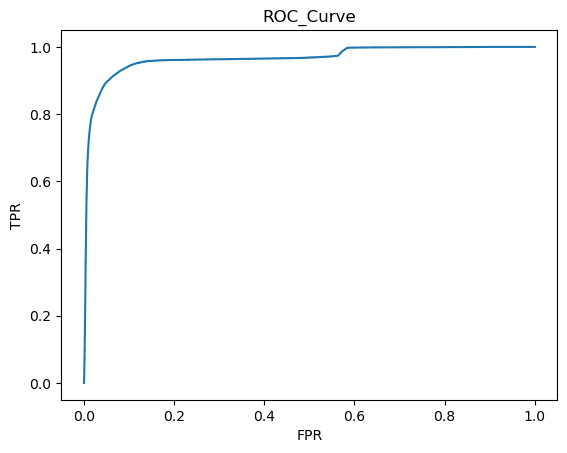

In [25]:


from sklearn.metrics import roc_curve


# Get Measures
FPR, TPR, threshold = roc_curve(y_test, y_pred_proba)

# Generate Figure
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_Curve")

## KNN Model

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define function
knn = KNeighborsClassifier()


# define a list of parameters
param_knn = {'n_neighbors': range(3, 8, 2)}   


#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

# the best hyperparameter chosen:
print('The Best hyperparameter choosen: ',grid_knn.best_params_)

print('The best validation score',grid_knn.best_score_)

The Best hyperparameter choosen:  {'n_neighbors': 3}
The best validation score 0.9826028571428571


In [27]:
y_test_knn = grid_knn.best_estimator_.predict(X_test)

In [28]:
print('Precision score:', precision_score(y_test, y_test_knn))
print('Recall score:', recall_score(y_test, y_test_knn))
print('Accuracy score:', accuracy_score(y_test, y_test_knn))
print('F1 score:', f1_score(y_test, y_test_knn))

Precision score: 0.8938699145236436
Recall score: 0.9292551771480874
Accuracy score: 0.9841733333333333
F1 score: 0.9112191473448018


In [29]:
y_test_knnproba = grid_knn.best_estimator_.predict_proba(X_test)[:,1]

In [30]:
print("AUC for KNN model:", roc_auc_score(y_test, y_test_knnproba))

AUC for KNN model: 0.9894064085706709


Text(0.5, 1.0, 'ROC_Curve')

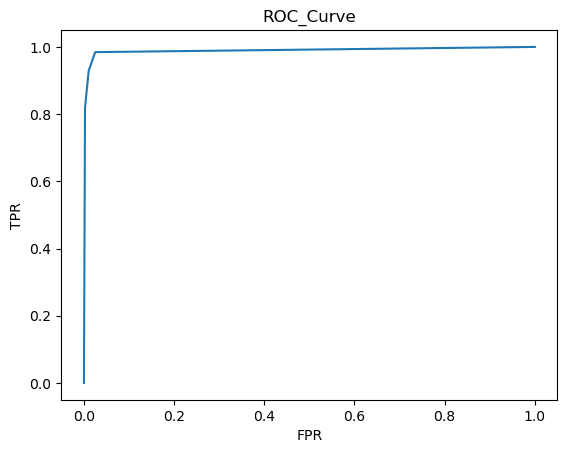

In [31]:

from sklearn.metrics import roc_curve


# Get Measures
FPR_knn, TPR_knn, threshold = roc_curve(y_test, y_test_knnproba)

# Generate Figure
plt.plot(FPR_knn, TPR_knn)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_Curve")

# Decision Tree

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [33]:
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

opt_tree = DecisionTreeClassifier(random_state = 42)

dt_params = {'max_depth':  range(1,10)}

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(1, 10)})

In [34]:
grid_tree.best_params_

{'max_depth': 7}

In [35]:
y_pred_dt = grid_tree.predict(X_test)

In [36]:
print('Test Accuracy of Decision Tree: ',grid_tree.score(X_test, y_test))
print('Train Accuracy of Decision Tree: ',grid_tree.score(X_train, y_train))

Test Accuracy of Decision Tree:  0.9999833333333333
Train Accuracy of Decision Tree:  1.0


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [38]:
print('Precision Score :',precision_score(y_test, y_pred_dt))
print('Recall Score:',recall_score(y_test, y_pred_dt))
print('F1 Score:',f1_score(y_test, y_pred_dt))
print('Confusin Matrix:',confusion_matrix(y_test, y_pred_dt))

Precision Score : 0.9999237223493517
Recall Score: 0.999885587887571
F1 Score: 0.9999046547548673
Confusin Matrix: [[273777      2]
 [     3  26218]]


In [39]:
from sklearn import tree
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_2 <= 4.00
|   |--- feature_0 <= 100.00
|   |   |--- feature_1 <= 50.03
|   |   |   |--- feature_1 <= 50.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_1 >  50.00
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- class: 1.0
|   |   |--- feature_1 >  50.03
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   

In [40]:
y_pred_proba_dt = grid_tree.predict_proba(X_test)[:,1]

In [41]:
from sklearn.metrics import roc_auc_score

print("AUC for Decision Tree:", roc_auc_score(y_test, y_pred_proba_dt))

AUC for Decision Tree: 0.999939141362689


Text(0.5, 1.0, 'ROC curve for Decision Tree')

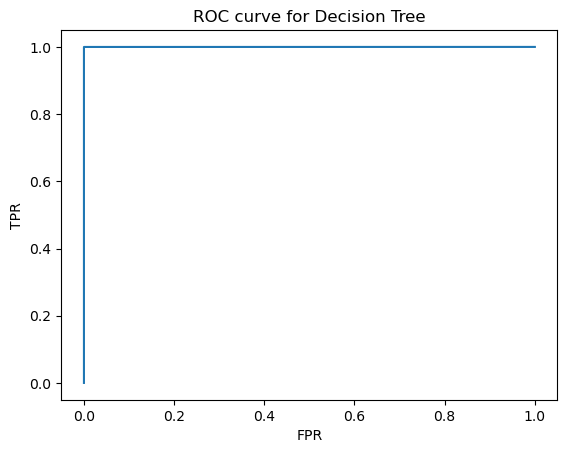

In [42]:
from sklearn.metrics import roc_curve

FPR_dt, TPR_dt, threshold = roc_curve(y_test, y_pred_proba_dt)

# Generate Figure
plt.plot(FPR_dt, TPR_dt)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC curve for Decision Tree')

## Random Forest (Robust Model)

Random Forest models are generally robust to skewness and outliers. The ensemble nature of Random Forest, which combines multiple decision trees, helps in reducing the impact of individual outliers. However, it's important to note the following considerations:

1. Decision Trees in Random Forest: Individual decision trees within the Random Forest may still be sensitive to outliers, especially if the trees are deep. Each tree makes decisions based on the features present in the data, and outliers can influence the splitting process.

2. Ensemble Averaging: The strength of Random Forest lies in the ensemble averaging of multiple trees. Outliers might affect a few trees, but their impact is mitigated when combining predictions from all trees. The final prediction tends to be more robust and less influenced by outliers.

3. Skewness: Random Forest is less sensitive to skewed distributions, as it works based on recursive binary splits and doesn't rely on assumptions about the distribution of the data.


In [43]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=25, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9999933333333333


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [45]:
print('Precision Score :',precision_score(y_test, y_pred))
print('Recall Score:',recall_score(y_test, y_pred))
print('F1 Score:',f1_score(y_test, y_pred))
print('Confusin Matrix:',confusion_matrix(y_test, y_pred))

Precision Score : 1.0
Recall Score: 0.9999237252583807
F1 Score: 0.9999618611746758
Confusin Matrix: [[273779      0]
 [     2  26219]]


In [46]:
y_pred_train = rf_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy train:", accuracy_train)

Accuracy train: 1.0


In [47]:
y_pred_proba = rf_classifier.predict_proba(X_test)[:,1]

In [48]:
from sklearn.metrics import roc_auc_score

# we have obtained the predicted probability in the previous step: y_pred_proba

print("AUC for random forests:", roc_auc_score(y_test, y_pred_proba))

AUC for random forests: 1.0


Text(0, 0.5, 'TPR')

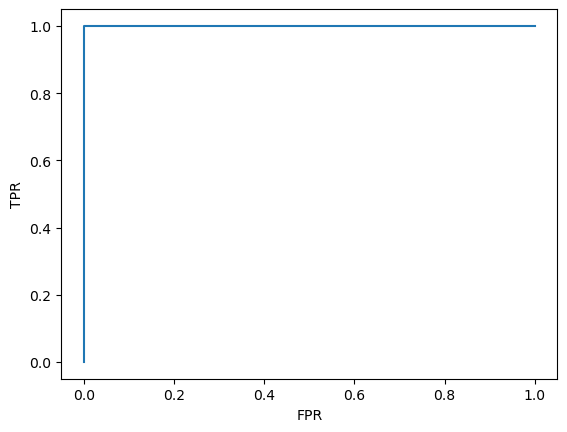

In [49]:
# Practice 2: Similar to Precision-Recall Curve

from sklearn.metrics import roc_curve

# Predicted Probability: y_pred_proba
# Get Measures
FPR_rf, TPR_rf, threshold = roc_curve(y_test, y_pred_proba)

# Generate Figure
plt.plot(FPR_rf, TPR_rf)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [50]:
rf_classifier.feature_importances_

array([0.14612402, 0.04434828, 0.52165852, 0.00805157, 0.05023165,
       0.0636472 , 0.16593876])